# 更改信号采样率
此示例说明如何更改信号的采样率。此示例有两个部分。第一部分将正弦输入的采样率从 44.1 kHz 改为 48 kHz。此工作流在音频处理中很常见。光盘上使用的采样率是 44.1 kHz，而数字音频磁带上使用的采样率是 48 kHz。第二部分将录制的语音样本的采样率从 7418 Hz 更改为 8192 Hz。

创建一个由多个正弦波组成的输入信号，采样率为 44.1 kHz。这些正弦波的频率为 2 kHz、4 kHz 和 8 kHz。

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

In [52]:
fs = 44100
tfs = 48000
t = np.arange(0, 1, 1/fs)
x = np.cos(2 * np.pi * 2000 * t) + 0.5 * np.sin(2 * np.pi * 4000 * (t - np.pi/4)) + 0.25 * np.cos(2 * np.pi * 8000 * t)

In [53]:
print(abs(tfs / fs) * fs - tfs)

7.275957614183426e-12


可以看到，P/Q*Fs 与所需采样率 48000 相差的数量级仅为10<sup>-12

In [59]:
y = signal.resample_poly(x, 48000, 44100)

In [64]:
tx = np.arange(0, len(x), 1)
ty = np.arange(0, len(y), 1)
print(len(x), len(y))

44100 48000


<ipython-input-65-3f363b5b1d88>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


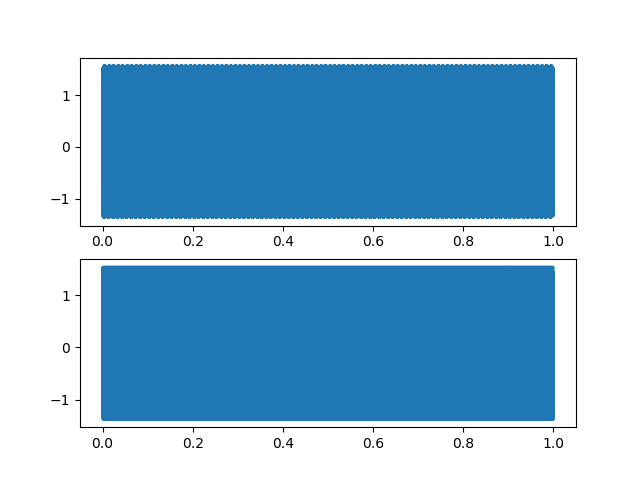

In [65]:
plt.subplot(211)
plt.plot(tx/fs, x)
plt.subplot(212)
plt.plot(ty/tfs, y)
plt.show()

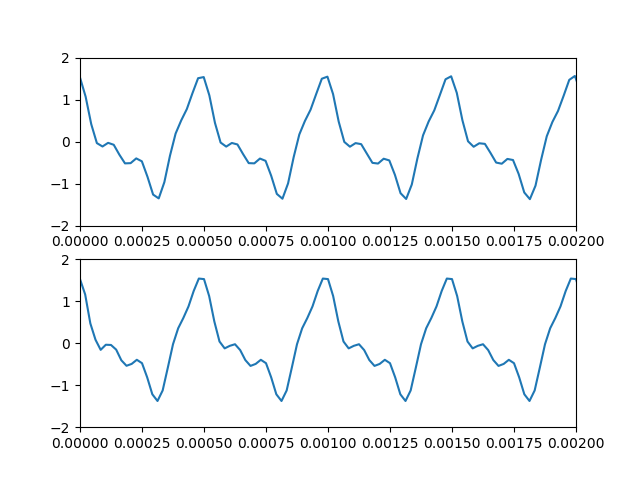

In [74]:
plt.subplot(211)
plt.plot(tx/fs, x)
plt.axis([0, 0.002, -2, 2])
plt.subplot(212)
plt.plot(ty/tfs, y)
plt.axis([0, 0.002, -2, 2])
plt.show()